Churn Prediction - Artificial Neural Network


In [2]:
import pandas as pd

In [3]:

# Importing the dataset
data = pd.read_csv('Churn_Modelling (2).csv',index_col='RowNumber')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# some columns are unwanted so let's remove them
data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [7]:
# One hot encoding - convert text into number
Geography_dum = pd.get_dummies(data=data,columns=['Geography'])

In [8]:
Geography_dum.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [9]:
Gender_dum = Geography_dum.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [10]:
Geography_dum.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
churn = Gender_dum

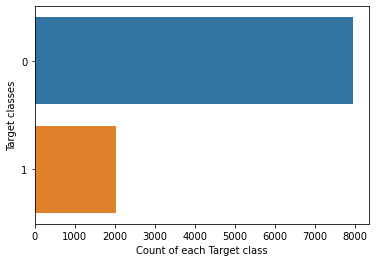

In [12]:
import seaborn as sns # data visualiaztion
import matplotlib.pyplot as plt # data visualization
sns.countplot(y=churn.Exited ,data=churn)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [13]:
X = churn.drop(['Exited'],axis=1)
y = churn.Exited

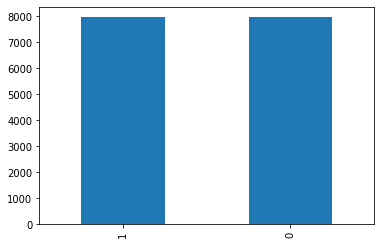

In [14]:
# SMOTE methods to balance our datasets , its gives equal entity to both values in opur target variable
from imblearn.over_sampling import SMOTE # SMOTE library
smote = SMOTE() # object the smote methods
X_sample, Y_sample = smote.fit_resample(X,y) # sampling the datasets
plot=Y_sample.value_counts().plot(kind='bar')# ploting the sampling dataset
plt.show()

In [15]:
# splitting the 80 % data for train and 20 % for  test for reduce the overfitting
from sklearn.model_selection import train_test_split, StratifiedKFold # stratifiedkfold for cross validation, it gives
#equal priority for both values.

x_train, x_test, y_train, y_test = train_test_split(X_sample,Y_sample,
                                                    stratify=Y_sample,
                                                    test_size=0.2,
                                                    random_state=42)

In [16]:
# showing shape of the data after sampling 
test_size=y_test.value_counts() # value counts in y test 
print("Test size after sampling:", test_size)
print("******************************")
train_size=y_train.value_counts()# value counts in y train
print("Train size after sampling :",  train_size)

Test size after sampling: 0    1593
1    1593
Name: Exited, dtype: int64
******************************
Train size after sampling : 0    6370
1    6370
Name: Exited, dtype: int64


In [17]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [18]:
# Artificial Neural Network

In [19]:

from keras.models import Sequential # sequential model to initialise our ann 
from keras.layers import Dense # dense module to build the layers

In [20]:
classifier = Sequential()

# Adding the input layer and the first hidden layer

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12)) # The first hidden layer has 6 nodes 

# Adding the second hidden layer

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu')) # 6 nodes 

# Adding the output layer

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # one nodes



In [21]:
# Compiling the ANN

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 1)

Epoch 1/100
1274/1274 [==============================] - 5s 3ms/step - loss: 0.5213 - accuracy: 0.7754
Epoch 2/100
1274/1274 [==============================] - 4s 3ms/step - loss: 0.4065 - accuracy: 0.8335
Epoch 3/100
1274/1274 [==============================] - 2s 2ms/step - loss: 0.3645 - accuracy: 0.8491
Epoch 4/100
1274/1274 [==============================] - 2s 2ms/step - loss: 0.3469 - accuracy: 0.8530
Epoch 5/100
1274/1274 [==============================] - 2s 2ms/step - loss: 0.3377 - accuracy: 0.8543
Epoch 6/100
1274/1274 [==============================] - 2s 2ms/step - loss: 0.3334 - accuracy: 0.8586
Epoch 7/100
1274/1274 [==============================] - 2s 2ms/step - loss: 0.3300 - accuracy: 0.8585
Epoch 8/100
1274/1274 [==============================] - 2s 2ms/step - loss: 0.3290 - accuracy: 0.8564
Epoch 9/100
1274/1274 [==============================] - 2s 2ms/step - loss: 0.3280 - accuracy: 0.8584
Epoch 10/100
1274/1274 [==============================] - 2s 2ms/step - l

In [23]:
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)

print('Train score:', score)
print('Train accuracy:', acc)

1274/1274 [==============================] - 2s 2ms/step - loss: 0.3172 - accuracy: 0.8578
Train score: 0.3171570599079132
Train accuracy: 0.8578492999076843


In [24]:
# Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Text(0.5, 15.0, 'Predicted label')

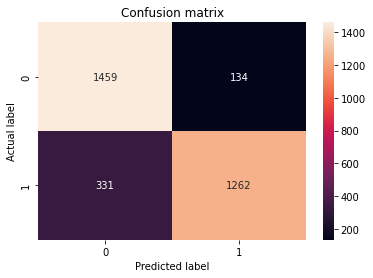

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="rocket" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1593
           1       0.90      0.79      0.84      1593

    accuracy                           0.85      3186
   macro avg       0.86      0.85      0.85      3186
weighted avg       0.86      0.85      0.85      3186



 Improving ANN with **Dropout** layer
 

In [27]:
# Dropout Regularization is used to reduce overfitting

In [28]:
# Improving the ANN
from keras.layers import Dropout
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))



In [29]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [30]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)


In [31]:
#  Making predictions and evaluating the model

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

1274/1274 [==============================] - 2s 1ms/step - loss: 0.3352 - accuracy: 0.8516
Train score: 0.33518245816230774
Train accuracy: 0.8515698313713074
********************
319/319 [==============================] - 1s 2ms/step - loss: 0.3490 - accuracy: 0.8402
Test score: 0.34900856018066406
Test accuracy: 0.8402385711669922


Text(0.5, 15.0, 'Predicted label')

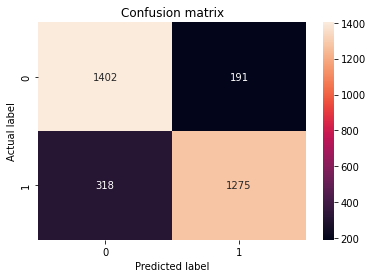

In [32]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="rocket" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1593
           1       0.87      0.80      0.83      1593

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



Tuning the ANN

In [35]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [36]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [37]:
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25,34],
              'epochs': [2,3], # if want we can some more epoch
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2) # if you want add cross validation
grid_search = grid_search.fit(X_train, y_train,verbose = 1)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


255/255 [==============================] - 1s 2ms/step - loss: 0.6479 - accuracy: 0.6477
Epoch 2/2
255/255 [==============================] - 1s 2ms/step - loss: 0.5169 - accuracy: 0.8005
Epoch 1/2
255/255 [==============================] - 1s 2ms/step - loss: 0.6331 - accuracy: 0.7608
Epoch 2/2
255/255 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7980
Epoch 1/2
255/255 [==============================] - 1s 2ms/step - loss: 0.6554 - accuracy: 0.7421
Epoch 2/2
255/255 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7928
Epoch 1/2
255/255 [==============================] - 1s 2ms/step - loss: 0.6404 - accuracy: 0.6785
Epoch 2/2
255/255 [==============================] - 1s 2ms/step - loss: 0.5141 - accuracy: 0.7914
Epoch 1/3
255/255 [==============================] - 1s 2ms/step - loss: 0.6325 - accuracy: 0.6997
Epoch 2/3
255/255 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.8030
Epoch 3/3
255/255 [=

In [38]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

Best Parameters after tuning: {'batch_size': 25, 'epochs': 3, 'optimizer': 'adam'}
Best Accuracy after tuning: 0.8095761381475668


 Multiple times of Training using cross validation

In [39]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 2,verbose=1)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 2)
mean = accuracies.mean()
variance = accuracies.std()

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]


637/637 [==============================] - 2s 2ms/step - loss: 0.5733 - accuracy: 0.7237
Epoch 2/2
637/637 [==============================] - 1s 1ms/step - loss: 0.4313 - accuracy: 0.8182
Epoch 1/2
637/637 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7575
Epoch 2/2
637/637 [==============================] - 1s 1ms/step - loss: 0.3914 - accuracy: 0.8115


In [41]:
print('Mean accuracy score of 2 different models using Kfold cross validation: {}'.format(mean))
print('Standard Deviation of accuracy score of 2 different models using Kfold cross validation: {}'.format(variance))

Mean accuracy score of 2 different models using Kfold cross validation: 0.8148351609706879
Standard Deviation of accuracy score of 2 different models using Kfold cross validation: 0.0033752024173736572
